### Práctica: Controlador PID.

**Objetivo:** Aplicar controladores Proporcional (P), Proporcional-Integral (PI) y Proporcional-Derivativo (PD) a un sistema de segundo orden (planta). Simular la respuesta en lazo cerrado ante una entrada escalón y analizar cómo cada acción de control afecta el error en estado estacionario, el sobreimpulso y el tiempo de estabilización.

---


#### Paso 1: Planteamiento del sistema (planta).

Para nuestro análisis, utilizaremos un sistema genérico de segundo orden (planta). La función de transferencia de la planta es:

$$G_p(s) = \frac{1}{s^2 + s + 1}$$

Este sistema es inherentemente estable y subamortiguado, pero su respuesta puede no ser adecuada para una aplicación específica por ejemplo, puede ser muy lenta o tener un error considerable. Nuestro objetivo es mejorar su comportamiento utilizando un controlador $G_c(s)$ en una configuración de lazo cerrado con retroalimentación unitaria.

![Figura del diagrama de bloques del sistema de control en lazo cerrado.](assets/images/P_2_03_Sistema_lazo_cerrado.png.jpg)

<p align="center"><em>Figura 1. Diagrama de bloques del sistema de control en lazo cerrado.<p align="center"><em>


La función de transferencia del sistema completo en lazo cerrado es:
$$G_{LC}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$

---


#### Paso 2: Simulación del Sistema sin Controlador.

Primero, simularemos la respuesta del sistema en lazo cerrado sin un controlador activo (o lo que es equivalente, un controlador con ganancia unitaria, $G_c(s) = 1$). Esta será la respuesta base para comparar el efecto de los controladores.

Función de Transferencia del sistema base (lazo cerrado):
<TransferFunction>: sys[13]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       1
  -----------
  s^2 + s + 2


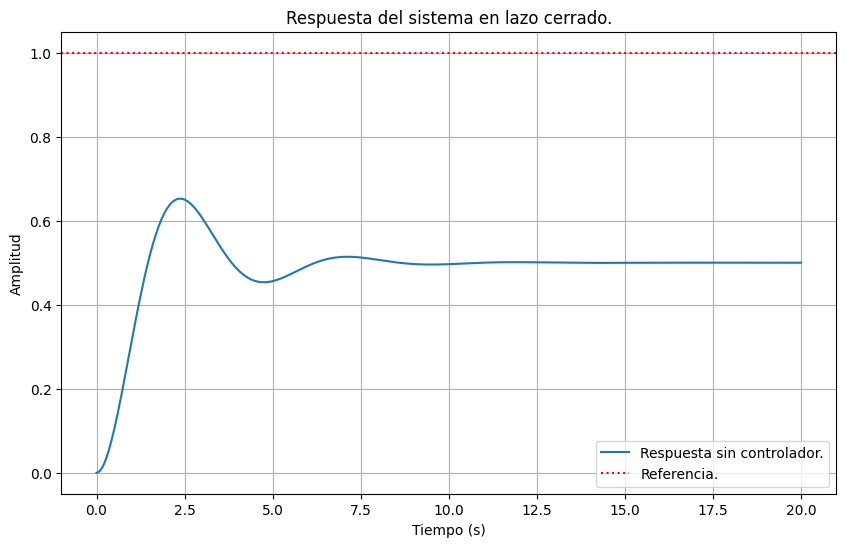

Métricas de desempeño del sistema base:
  - Sobreimpulso (Overshoot): 30.50%
  - Tiempo de establecimiento (SettlingTime): 7.81 s
  - Valor final: 0.5000
  - Error en estado estacionario (1 - valor_final): 0.5000


In [6]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Definición de la planta Gp(s). ---
num_p = [1]
den_p = [1, 1, 1]
Gp = ct.tf(num_p, den_p)

# --- Sistema en lazo cerrado con retroalimentación unitaria (sin controlador). ---
# Esto es Gc(s) = 1.
sistema_base = ct.feedback(Gp, 1)
print("Función de Transferencia del sistema base (lazo cerrado):")
print(sistema_base)

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 20, 501)
t, y_base = ct.step_response(sistema_base, T=t)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Respuesta del sistema en lazo cerrado.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema base:")
info = ct.step_info(sistema_base)

# step_info devuelve un diccionario, podemos imprimir los valores clave.
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")

# El error en estado estacionario se verifica observando el valor final.
valor_final = y_base[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")


#### Paso 3: Análisis con Control Proporcional (P).

La acción de control más simple es la proporcional. El controlador es simplemente una ganancia, $K_p$:

$$G_c(s) = K_p$$

Esta acción aumenta la "fuerza" de la señal de control en proporción al error. Generalmente, un $K_p$ más alto reduce el error en estado estacionario y acelera la respuesta, pero a costa de un mayor sobreimpulso.

Función de Transferencia del sistema de lazo cerrado con controlador Proporcional:
<TransferFunction>: sys[20]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       5
  -----------
  s^2 + s + 6


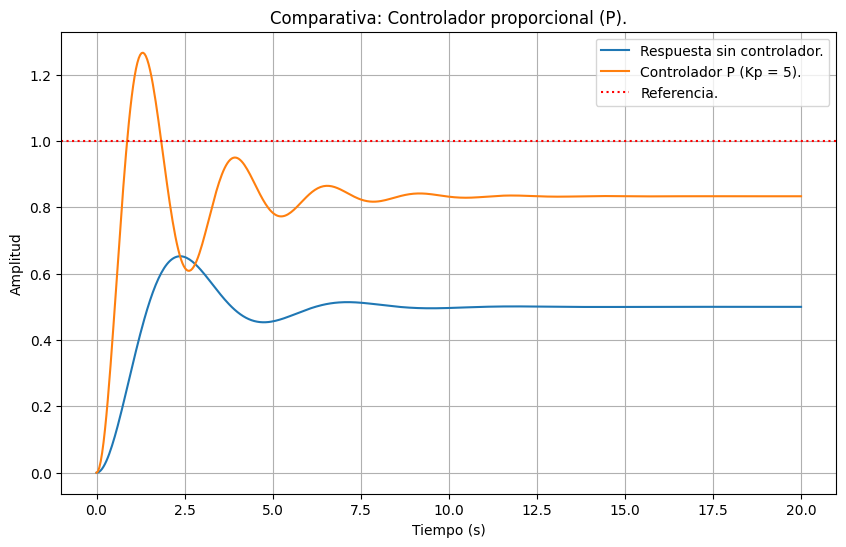

Métricas de desempeño del sistema con controlador Proporcional:
  - Sobreimpulso (Overshoot): 51.88%
  - Tiempo de establecimiento (SettlingTime): 7.06 s
  - Valor final: 0.8334
  - Error en estado estacionario (1 - valor_final): 0.1666


In [7]:
# --- Parámetros del controlador Proporcional. ---
Kp = 5

# --- Creación del controlador P. ---
Gc_P = ct.tf([Kp], [1])

# --- Sistema en lazo cerrado con controlador P. ---
sistema_P = ct.feedback(Gc_P * Gp, 1)
print("Función de Transferencia del sistema de lazo cerrado con controlador Proporcional:")
print(sistema_P)

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 20, 501)
t, y_P = ct.step_response(sistema_P, T=t)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.plot(t, y_P, label=f"Controlador P (Kp = {Kp}).")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Comparativa: Controlador proporcional (P).")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional:")
info = ct.step_info(sistema_P)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_P[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")



#### Paso 4: Análisis con Control Proporcional-Integral (PI).

Para eliminar el error en estado estacionario que el control P no pudo corregir, añadimos una acción integral:

$$G_c(s) = K_p + \frac{K_i}{s} = \frac{K_p s + K_i}{s}$$

La acción integral acumula el error a lo largo del tiempo. Mientras exista un error, la acción integral seguirá aumentando la señal de control hasta que el error sea cero. Su desventaja es que puede empeorar la respuesta transitoria (más sobreimpulso).

Función de Transferencia del sistema de lazo cerrado con controlador Proporcional-Integral:
<TransferFunction>: sys[27]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5 s + 3
  -------------------
  s^3 + s^2 + 6 s + 3


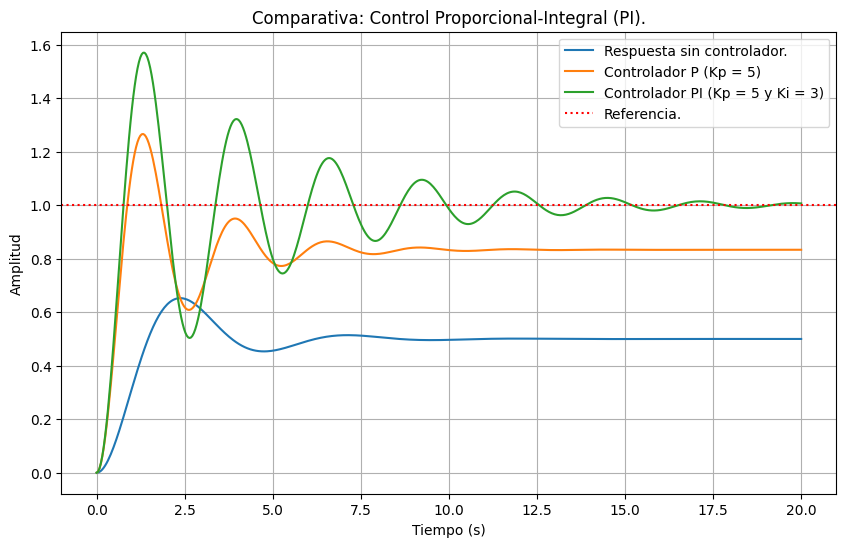

Métricas de desempeño del sistema con controlador Proporcional-Integral:
  - Sobreimpulso (Overshoot): 56.97%
  - Tiempo de Establecimiento (SettlingTime): 14.86 s
  - Valor final: 1.0066
  - Error en estado estacionario (1 - valor_final): -0.0066


In [8]:
# --- Parámetros del controlador Proporcional-Integral. ---
Kp_pi = 5
Ki = 3

# --- Creación del controlador PI. ---
# El numerador es [Kp, Ki] y el denominador es [1, 0] (representando 1/s).
Gc_PI = ct.tf([Kp_pi, Ki], [1, 0])

# --- Sistema en lazo cerrado con controlador PI. ---
sistema_PI = ct.feedback(Gc_PI * Gp, 1)
print("Función de Transferencia del sistema de lazo cerrado con controlador Proporcional-Integral:")
print(sistema_PI)

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 20, 501)
t, y_PI = ct.step_response(sistema_PI, T=t)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.plot(t, y_P, label=f"Controlador P (Kp = {Kp})")
plt.plot(t, y_PI, label=f"Controlador PI (Kp = {Kp_pi} y Ki = {Ki})")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Comparativa: Control Proporcional-Integral (PI).")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional-Integral:")
info = ct.step_info(sistema_PI)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de Establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_PI[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")

#### Paso 5: Análisis con Control Proporcional-Derivativo (PD).

La acción derivativa introduce un elemento de "anticipación". Actúa sobre la velocidad de cambio del error, lo que ayuda a amortiguar las oscilaciones y reducir el sobreimpulso:

$$G_c(s) = K_p + K_d s$$

Un control PD mejora la estabilidad y la respuesta transitoria. Sin embargo, no corrige el error en estado estacionario por sí solo y es sensible al ruido en la señal de error.


Función de Transferencia del sistema de lazon cerrado con controlador Proporcional-Derivativo:
<TransferFunction>: sys[34]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     3 s + 5
  -------------
  s^2 + 4 s + 6


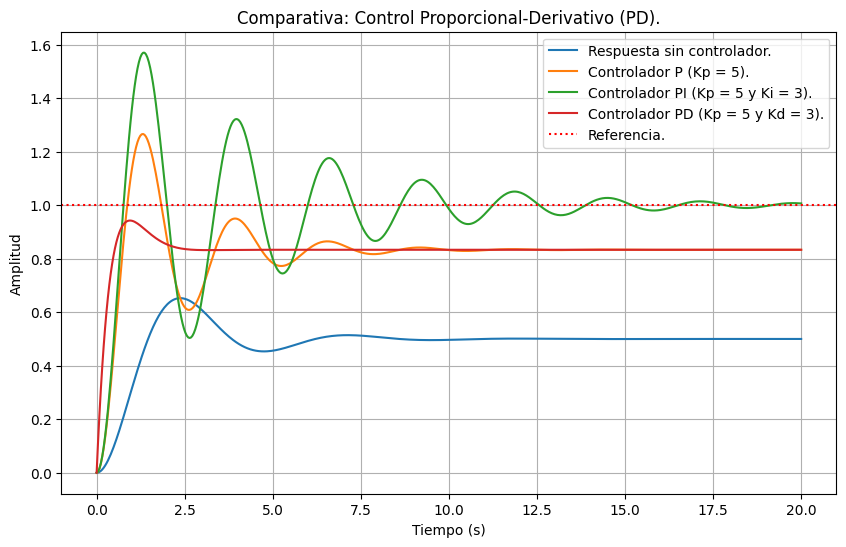

Métricas de desempeño del sistema con controlador Proporcional-Derivativo:
  - Sobreimpulso (Overshoot): 13.12%
  - Tiempo de establecimiento (SettlingTime): 2.09 s
  - Valor final: 0.8333
  - Error en estado estacionario (1 - valor_final): 0.1667


In [9]:
# --- Parámetros del controlador Proporcional-Derivativo. ---
Kp_pd = 5
Kd = 3

# --- Creación del controlador PD. ---
# El numerador es [Kd, Kp].
Gc_PD = ct.tf([Kd, Kp_pd], [1])

# --- Sistema en lazo cerrado con controlador PD. ---
sistema_PD = ct.feedback(Gc_PD * Gp, 1)
print("Función de Transferencia del sistema de lazon cerrado con controlador Proporcional-Derivativo:")
print(sistema_PD)

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 20, 501)
t, y_PD = ct.step_response(sistema_PD, T=t)

plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.plot(t, y_P, label=f"Controlador P (Kp = {Kp}).")
plt.plot(t, y_PI, label=f"Controlador PI (Kp = {Kp_pi} y Ki = {Ki}).")
plt.plot(t, y_PD, label=f"Controlador PD (Kp = {Kp_pd} y Kd = {Kd}).")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Comparativa: Control Proporcional-Derivativo (PD).")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional-Derivativo:")
info = ct.step_info(sistema_PD)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_PD[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")



#### Ejercicio propuesto: Sintonización de un controlador PID.

Ahora que has visto el efecto de cada acción de control por separado, tu tarea es combinarlas en un controlador **Proporcional-Integral-Derivativo (PID)** y sintonizar sus ganancias para cumplir con ciertos requisitos de desempeño.

La función de transferencia de un controlador PID es:

$$G_c(s) = K_p + \frac{K_i}{s} + K_d s = \frac{K_d s^2 + K_p s + K_i}{s}$$

**Instrucciones:**

1.  **Implementar un controlador PID:** Utiliza la misma planta $G_p(s)$ de la práctica. Agrega una celda de Python que implemente el sistema en lazo cerrado con un controlador PID.

2.  **Sintonizar las ganancias:** Experimenta con los valores de $K_p$, $K_i$ y $K_d$ para lograr que la respuesta al escalón del sistema cumpla con los siguientes tres objetivos **simultáneamente**:
    * **Error en estado estacionario:** Cero.
    * **Sobreimpulso (Overshoot):** Menor al 10 %.
    * **Tiempo de establecimiento (al 2 %):** Menor a 5 segundos.

3.  **Presentar resultados:**
    * En una celda de código, muestra tu implementación final del controlador PID con las ganancias que elegiste.
    * Genera una gráfica que compare la respuesta del sistema base con la respuesta de tu sistema sintonizado con el controlador PID.
    * En una celda de Markdown, explica brevemente el razonamiento que seguiste para elegir tus valores finales de $K_p$, $K_i$ y $K_d$. ¿Qué efecto tuvo aumentar o disminuir cada ganancia en tu proceso de sintonización?



**SOLUCIÓN DEL EJERCICIO PROPUESTO**

Dada la función de transferencia de un controlador PID:

$$G_c(s) = K_p + \frac{K_i}{s} + K_d s = \frac{K_d s^2 + K_p s + K_i}{s}$$

Y tomando en cuenta que:

$$G_p(s) = \frac{1}{s^2 + s + 1}$$

Utilizaremos parametros para $K_p$, $K_i$, $K_d$ con el objetivo de encontrar el estado estacionario cero, un sobreimpulso menor al 10% y un tiempo de establecimiento menor a 5 segundos. 



Función de Transferencia del sistema de lazo cerrado con controlador Proporcional-Derivativo-Integral:
<TransferFunction>: sys[41]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     2 s^2 + 4 s + 3
  ---------------------
  s^3 + 3 s^2 + 5 s + 3


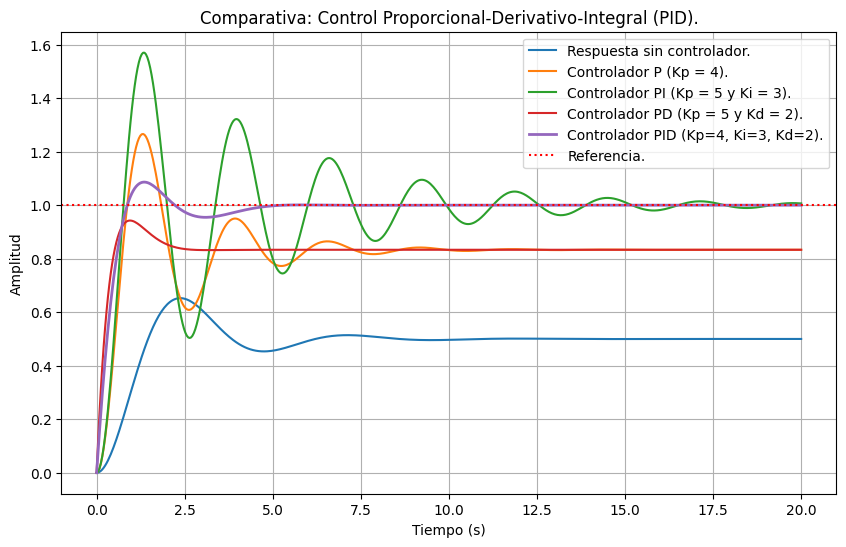

Métricas de desempeño del sistema con controlador Proporcional-Derivativo:
  - Sobreimpulso (Overshoot): 8.62% 
  - Tiempo de establecimiento (SettlingTime): 4.19 s
  - Valor final: 1.0000
  - Error en estado estacionario (1 - valor_final): 0.0000


In [10]:
# --- Parámetros del controlador Proporcional-Derivativo. ---
Kp = 4
Kd = 2
Ki = 3

# --- Creación del controlador PID . ---
# El numerador es [Kd, Kp].
Gc_PID = ct.tf([Kd, Kp, Ki], [1, 0])

# --- Sistema en lazo cerrado con controlador PD. ---
sistema_PID = ct.feedback(Gc_PID * Gp, 1)
print("Función de Transferencia del sistema de lazo cerrado con controlador Proporcional-Derivativo-Integral:")
print(sistema_PID)

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 20, 501)
t, y_PID = ct.step_response(sistema_PID, T=t)

plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.plot(t, y_P, label=f"Controlador P (Kp = {Kp}).")
plt.plot(t, y_PI, label=f"Controlador PI (Kp = {Kp_pi} y Ki = {Ki}).")
plt.plot(t, y_PD, label=f"Controlador PD (Kp = {Kp_pd} y Kd = {Kd}).")
plt.plot(t, y_PID, label=f"Controlador PID (Kp={Kp}, Ki={Ki}, Kd={Kd}).", linewidth=2)
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Comparativa: Control Proporcional-Derivativo-Integral (PID).")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional-Derivativo:")
info = ct.step_info(sistema_PID)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}% ")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_PID[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")

La combinación de valores fueron:

$K_p = 4$

$K_i = 3$

$K_d = 2$

El proceso de sintonización consistió en encontrar un balance entre la velocidad del sobreimpulso por las ganancias $K_p$ y $K_i$, y la estabilidad, controlada por $K_d$, para poder cumplir los tres objetivos simultáneamente.

La elección de $K_i=3$ fue importante para eliminar el error estacionario. Se observó que un valor más alto de $K_i$ provocaba que tanto el sobreimpulso como el tiempo de establecimiento superaran los límites requeridos.

Para $K_p$ se escogió el valor de 4, ya que representaba el mejor equilibrio. Al disminuirlo, la respuesta se volvía demasiado lenta; al aumentarlo, la respuesta oscilaba con mayor agresividad y, aunque el error se eliminaba rápido, el sobreimpulso aumentaba demasiado.

Por último, se asignó $K_d=2$. Ya que con los valores ya establecidos de $K_p$ y $K_i$, esté fue el valor exacto que logró reducir el pico del sobreimpulso justo por debajo del límite del 10%, mejorando la estabilidad general del sistema y cumpliendo así todos los requisitos.